#  Decision Trees

In [1]:
# Initial imports
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = "C:/Users/VivoBook/Desktop/Classwork/capstoneproject-2022/Database/merged_demo.csv"
merged_demo = pd.read_csv(file_path)
merged_demo.head()

,county,year,number_sales,sales_percentage,population,pop_percentage,county_count,state_count,total_incentives,county_max,...,previous_evs,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles
0,Alameda,2015,5536,8.65,1630159,4.19,0,6,6,0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
1,Alameda,2016,5327,7.35,1647332,4.21,0,6,6,0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
2,Alameda,2017,7056,7.61,1659750,4.22,0,6,6,0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
3,Alpine,2017,1,0.00,1211,0.00,0,6,6,0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
4,Amador,2015,15,0.02,36905,0.09,0,6,6,0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26


In [3]:
merged_demo.dtypes

county                 object
year                    int64
number_sales            int64
sales_percentage      float64
population              int64
pop_percentage        float64
county_count            int64
state_count             int64
total_incentives        int64
county_max              int64
state_max               int64
total_max               int64
previous_evs            int64
household_income      float64
importance_of_gge     float64
homeowner             float64
education             float64
commute_distance      float64
age                   float64
gender                float64
number_of_vehicles    float64
annual_miles          float64
dtype: object

In [4]:
# Use OneHotEncoder to transform cetegorical data (county)
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# reshaped = np.array(counties).reshape(-1,1)

# transform data
ohc = encoder.fit_transform(merged_demo[["county"]])
counties_df = pd.DataFrame(ohc)
counties_df.columns = encoder.get_feature_names(["county"])
counties_df

C:\Users\VivoBook\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,county_Sonoma,county_Stanislaus,county_Sutter,county_Tehama,county_Trinity,county_Tulare,county_Tuolumne,county_Ventura,county_Yolo,county_Yuba
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# Merge ohc and merged_demo, drop categorical "county"
ohc_merged = pd.merge(counties_df, merged_demo, left_index=True, right_index=True).sort_values(by=["county", "year"], axis=0, ascending=True).reset_index(level=None, drop=True, inplace=False)
ohc_merged = ohc_merged.drop(columns=["county", "sales_percentage"], axis=1)
ohc_merged

,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,previous_evs,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10


In [6]:
# Define features set
X = ohc_merged.drop("number_sales", axis=1)
y = ohc_merged["number_sales"]

In [7]:
# Split into Train and Test sets, StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=75, train_size=0.80)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 77)
(34, 77)
(134,)
(34,)


## Fitting the Random Forest Model

In [9]:
# Create and fit the random forest regressor instance
rf_model = RandomForestRegressor(random_state=75, n_estimators=500).fit(X_train_scaled, y_train)

## Making Predictions Using the Data

In [10]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_scaled)
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9863153175686459
Testing Data Score: 0.9068620031572626


## Rank Importance of Features

In [11]:
# Calculate feature importance in the Random Forest model.
feature_importances = rf_model.feature_importances_
feature_importances

array([2.77787116e-02, 6.15838825e-08, 6.59967362e-08, 1.49739096e-06,
       2.13599135e-07, 6.96520486e-09, 1.86353705e-03, 1.17872975e-08,
       6.07509283e-05, 2.95235138e-04, 8.93392717e-10, 1.49202988e-05,
       2.84762784e-07, 1.29864743e-08, 5.13373647e-06, 9.35337439e-07,
       4.76704552e-07, 4.56192992e-10, 1.75536174e-01, 3.33485051e-06,
       1.44637340e-04, 2.56126726e-08, 8.24620238e-06, 4.14861213e-06,
       6.89028459e-09, 4.82652250e-07, 7.73628253e-05, 7.67066073e-06,
       1.27918185e-05, 1.04876581e-01, 3.24201790e-04, 6.02586797e-06,
       3.99451179e-03, 1.02742070e-04, 9.65496237e-06, 2.97740973e-03,
       4.26370884e-02, 4.84867031e-04, 5.45741677e-05, 7.59665108e-05,
       3.03933340e-03, 1.06924545e-04, 1.64778752e-01, 1.44739162e-04,
       1.75219511e-05, 1.43137459e-07, 1.32549180e-07, 2.99984831e-05,
       2.24422326e-04, 5.05424225e-05, 6.50007485e-06, 1.07353228e-05,
       3.33090109e-08, 2.48319739e-05, 1.46558948e-07, 2.47853697e-03,
      

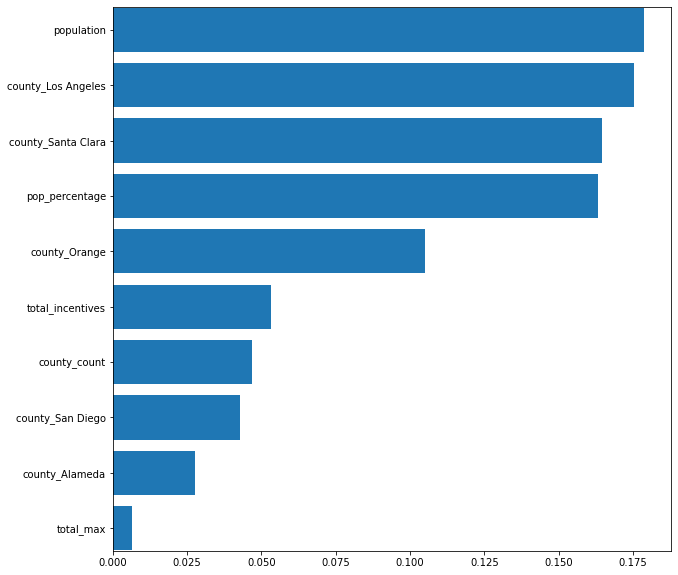

In [12]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols[-10:], width=width[-10:])

plt.show()

# Visualize regression results

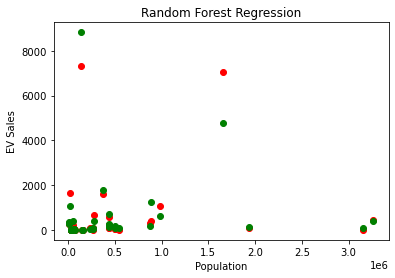

In [17]:
# Visualize model’s predictions for population
# Real values = red, predicted = green
# Code found here: https://cnvrg.io/random-forest-regression/
plt.scatter(X_test['population'].values, y_test, color = 'red')
plt.scatter(X_test['population'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Population')
plt.ylabel('EV Sales')
plt.show() 

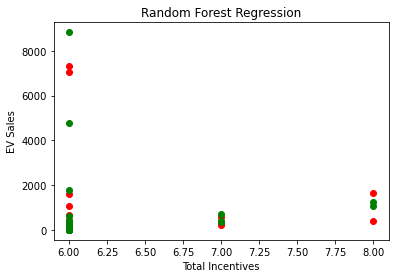

In [21]:
# Visualize model’s predictions for total_incentives
# Real values = red, predicted = green
plt.scatter(X_test['total_incentives'].values, y_test, color = 'red')
plt.scatter(X_test['total_incentives'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Total Incentives')
plt.ylabel('EV Sales')
plt.show() 

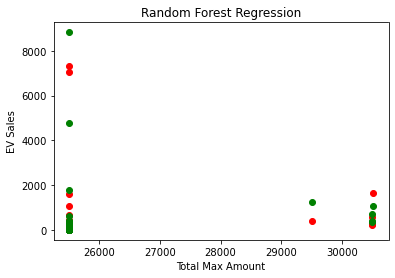

In [22]:
# Visualize model’s predictions for total_max
# Real values = red, predicted = green
plt.scatter(X_test['total_max'].values, y_test, color = 'red')
plt.scatter(X_test['total_max'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Total Max Amount')
plt.ylabel('EV Sales')
plt.show() 

# Gradient Boosting Regressor

In [23]:
# Try for better results based off stacked predictors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbr = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbr = gbr.fit(X_train_scaled, y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_test, gbr.predict(X_test_scaled))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbr.predict(X_test_scaled)
        print("Accuracy on training set: %.3f" % gbr.score(X_train_scaled, y_train))
        print("Accuracy on test set: %.3f" % gbr.score(X_test_scaled, y_test))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 316869.0231
Accuracy on training set: 0.998
Accuracy on test set: 0.888
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 314798.4079
Accuracy on training set: 1.000
Accuracy on test set: 0.889
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 315263.2406
Accuracy on training set: 1.000
Accuracy on test set: 0.889
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 215353.1010
Accuracy on training set: 1.000
Accuracy on test set: 0.924
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 1773626.3745
Accuracy on training set: 0.784
Accuracy on test set: 0.374
predict output for

In [24]:
# Check best results in dataframe
X_test.loc[:, ['number_sales']] = pred2
X_test.head()

,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles,number_sales
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26,1092.916164
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26,1092.916164
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44,1092.916164
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10,1092.916164
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44,1092.916164


In [25]:
# Testing parameters that give best results
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750)

gbt = gbt.fit(X_train_scaled, y_train)
print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(y_test, gbt.predict(X_test_scaled))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

pred2 = gbt.predict(X_test_scaled)
print("The best accuracy on training set: %.3f" % gbt.score(X_train_scaled, y_train))
print("The best accuracy on test set: %.3f" % gbt.score(X_test_scaled, y_test))

predict output for GradientBoostingRegressor: learning_rate=0.001, n_estimators=750
The mean squared error (MSE) on test set: 247685.3591
The best accuracy on training set: 1.000
The best accuracy on test set: 0.913
